In [1]:
import tensorflow as tf
import numpy as np
from huggingface_hub import from_pretrained_keras
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
print(tf.__version__)

2.14.0


In [3]:
image_folder = r'D:\_DOCUMENTE_RARES\Desktop\ortho-vision\ai\resources\Panoramic Dental Xray Dataset-Automatixc tooth instance segmentation and identification\Panoramic Dental Xray Dataset'

In [4]:
model = from_pretrained_keras("SerdarHelli/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net")

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 32)         320       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 32)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 32)         9248      ['dropout[0][0]']             
                                                                                              

In [6]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [512, 512])
    return image

In [7]:
def generate_mask(image):
    image_batch = tf.expand_dims(image, axis=0)
    model_output = model.predict(image_batch)
    mask = tf.squeeze(model_output)
    mean_value = tf.reduce_mean(mask).numpy()
    mask = tf.cast(mask > mean_value, tf.uint8)
    return mask

In [8]:
def plot_image_with_mask(image, mask):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.title("Generated Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")
    plt.show()

In [ ]:
import random

image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg'))]
random_images = random.sample(image_files, min(5, len(image_files)))

for image_file in random_images:
    image_path = os.path.join(image_folder, image_file)
    image = preprocess_image(image_path)  
    image = np.expand_dims(image, axis=0)  
    predicted_image = model.predict(image)
    predict = predicted_image[0, :, :, 0]
    _, binary_mask = cv2.threshold(predict, 0.5, 1, cv2.THRESH_BINARY)
    binary_mask = (binary_mask * 255).astype(np.uint8)
    kernel = np.ones((5, 5), np.uint8) 
    dilated_mask = cv2.dilate(binary_mask, kernel, iterations=5)
    eroded_mask = cv2.erode(dilated_mask, kernel, iterations=5)
    
    plt.imshow(eroded_mask, cmap='gray')
    plt.axis('off')
    plt.show()
    

1/1 [==============================] - 1s 775ms/step


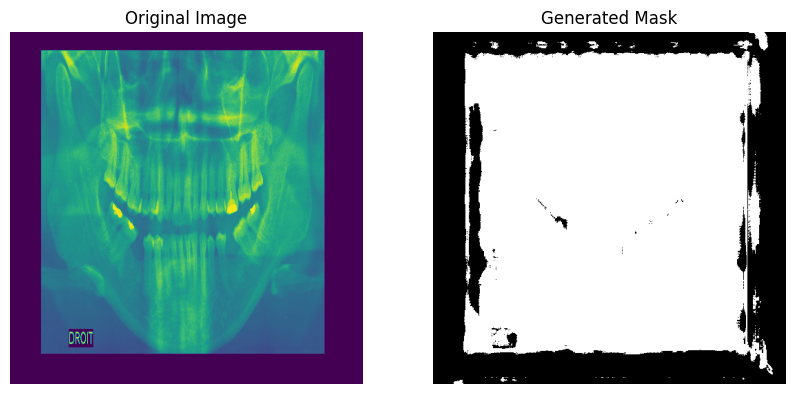

1/1 [==============================] - 1s 717ms/step


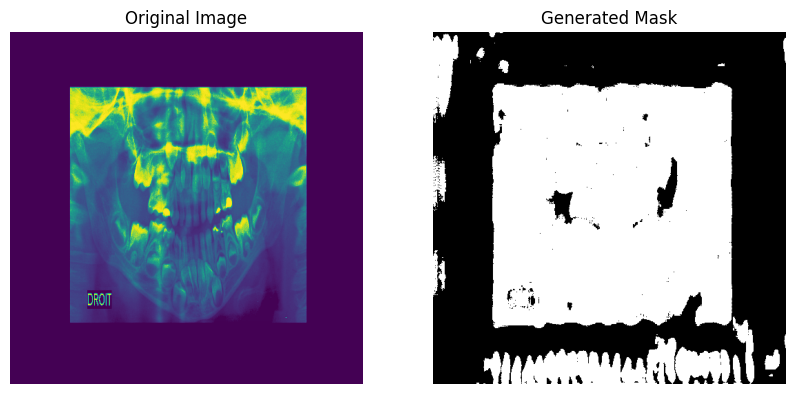

1/1 [==============================] - 1s 763ms/step


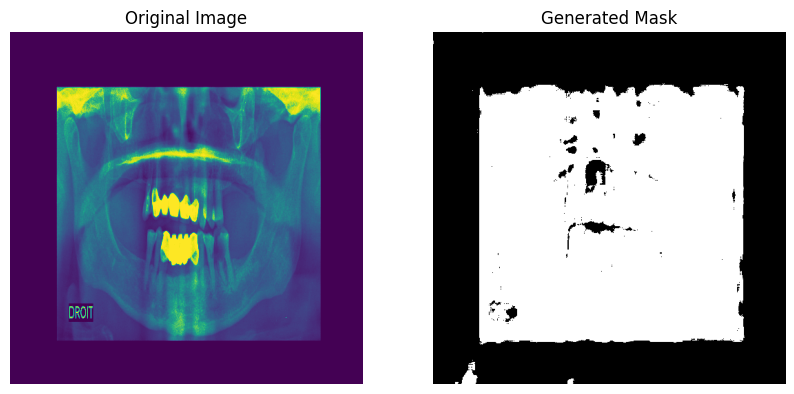

1/1 [==============================] - 1s 771ms/step


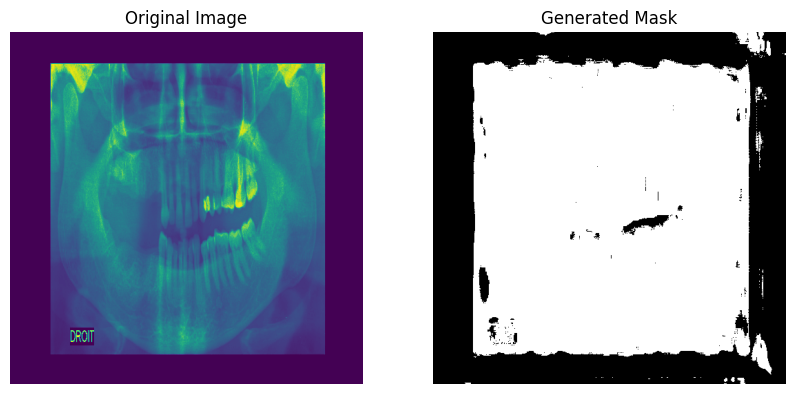

1/1 [==============================] - 1s 732ms/step


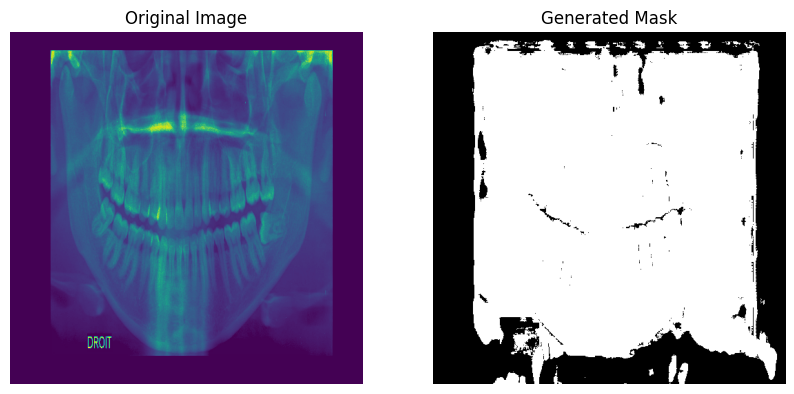

In [10]:
import random

image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg'))]
random_images = random.sample(image_files, min(5, len(image_files)))

for image_file in random_images:
    image_path = os.path.join(image_folder, image_file)
    image = preprocess_image(image_path)
    mask = generate_mask(image)
    plot_image_with_mask(image, mask)
    # mask = tf.cast(mask, tf.uint8)
    # mask_np = mask.numpy()
    # cv2.imwrite(f"{image_path}_generated_mask.png", mask_np * 255)